## Projeto final de Python - EBAC

analise de dados financeiros 
Aluno- Gabriel Fernando Alves santana

## Contexto geral

O conjunto de dados está no formato CSV e inclui informações sobre clientes de uma instituição financeira. Nossa coluna alvo é a coluna "default", que indica se o cliente está adimplente (default = 0) ou inadimplente (default = 1). Nosso objetivo é compreender os fatores que levam um cliente a não honrar suas dívidas, analisando o impacto de outros atributos, como salário, escolaridade e movimentação financeira. Abaixo está uma descrição completa dos atributos disponíveis.


| Coluna  | Descrição |
| ------- | --------- |
| id      | Número da conta |
| default | Indica se o cliente é adimplente (0) ou inadimplente (1) |
| idade   | --- |
| sexo    | --- |
| depedentes | --- |
| escolaridade | --- |
| estado_civil | --- |
| salario_anual | Faixa do salario mensal multiplicado por 12 |
| tipo_cartao | Categoria do cartao: blue, silver, gold e platinium |
| meses_de_relacionamento | Quantidade de meses desde a abertura da conta |
| qtd_produtos | Quantidade de produtos contratados |
| iteracoes_12m | Quantidade de iteracoes com o cliente no último ano |
| meses_inatico_12m | Quantidade de meses que o cliente ficou inativo no último ano |
| limite_credito | Valor do limite do cartão de crédito |
| valor_transacoes_12m | Soma total do valor das transações no cartão de crédito no último ano |
| qtd_transacoes_12m | Quantidade total de transações no cartão de crédito no último ano |



## Importando base de dados

In [1]:
import pandas as pd
base_de_dados =pd.read_csv("Python_M10_support_material.CSV", na_values="na") # importando a base de dados.
df = pd.DataFrame(base_de_dados) # transformando a base de dados em um Dataframe de pandas.


## Análise exploratória dos dados 

In [4]:
df.head() # Visualisando as 5 primeira linhas da base de dados.

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


In [6]:
df.tail() # Visualisando as 5 últimas linhas da base de dados.

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
10122,772366833,0,50,M,2,mestrado,solteiro,$40K - $60K,blue,40,3,3,2,"4.003,91","15.476,26",117
10123,710638233,1,41,M,2,NaN,divorciado,$40K - $60K,blue,25,4,3,2,"4.277,04","8.764,88",69
10124,716506083,1,44,F,1,ensino medio,casado,menos que $40K,blue,36,5,4,3,"5.409,16","10.291,78",60
10125,717406983,1,30,M,2,mestrado,NaN,$40K - $60K,blue,36,4,3,3,"5.281,84","8.395,62",62
10126,714337233,1,43,F,2,mestrado,casado,menos que $40K,silver,25,6,4,2,"10.388,80","10.294,96",61


In [8]:
df.info() # Visualizando informações da base de dados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       10127 non-null  int64 
 1   default                  10127 non-null  int64 
 2   idade                    10127 non-null  int64 
 3   sexo                     10127 non-null  object
 4   dependentes              10127 non-null  int64 
 5   escolaridade             8608 non-null   object
 6   estado_civil             9378 non-null   object
 7   salario_anual            9015 non-null   object
 8   tipo_cartao              10127 non-null  object
 9   meses_de_relacionamento  10127 non-null  int64 
 10  qtd_produtos             10127 non-null  int64 
 11  iteracoes_12m            10127 non-null  int64 
 12  meses_inativo_12m        10127 non-null  int64 
 13  limite_credito           10127 non-null  object
 14  valor_transacoes_12m     10127 non-nul

Durante a análise, foi observado que as colunas "limite_credito" e "valor_transacao_12m" estão no formato object, mas fariam mais sentido se fossem do tipo float. Essa conversão permitirá manipular os dados com mais precisão em cálculos e análises financeiras, além de possibilitar a utilização de métodos específicos para variáveis numéricas.

In [11]:
## Convertendo as colunas "limite_credito" e "valor_transacoes_12m" para tipo float.
df["limite_credito"] = df["limite_credito"].str.replace(".", "", regex=False).str.replace(",", ".", regex=False).astype(float)
df["valor_transacoes_12m"] = df["valor_transacoes_12m"].str.replace(".","", regex= False).str.replace(",",".", regex= False).astype(float)

In [13]:
df.info() # Verificando se a conversão foi feita corretamente.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       10127 non-null  int64  
 1   default                  10127 non-null  int64  
 2   idade                    10127 non-null  int64  
 3   sexo                     10127 non-null  object 
 4   dependentes              10127 non-null  int64  
 5   escolaridade             8608 non-null   object 
 6   estado_civil             9378 non-null   object 
 7   salario_anual            9015 non-null   object 
 8   tipo_cartao              10127 non-null  object 
 9   meses_de_relacionamento  10127 non-null  int64  
 10  qtd_produtos             10127 non-null  int64  
 11  iteracoes_12m            10127 non-null  int64  
 12  meses_inativo_12m        10127 non-null  int64  
 13  limite_credito           10127 non-null  float64
 14  valor_transacoes_12m  

In [10]:
for coluna in df.columns: # Verificando valores unicos de cada coluna do DataFrame
    print(f"os valores unicos na coluna {coluna} são {df[coluna].unique()}")

os valores unicos na coluna id são [768805383 818770008 713982108 ... 716506083 717406983 714337233]
os valores unicos na coluna default são [0 1]
os valores unicos na coluna idade são [45 49 51 40 44 32 37 48 42 65 56 35 57 41 61 47 62 54 59 63 53 58 55 66
 50 38 46 52 39 43 64 68 67 60 73 70 36 34 33 26 31 29 30 28 27]
os valores unicos na coluna sexo são ['M' 'F']
os valores unicos na coluna dependentes são [3 5 4 2 0 1]
os valores unicos na coluna escolaridade são ['ensino medio' 'mestrado' 'sem educacao formal' nan 'graduacao'
 'doutorado']
os valores unicos na coluna estado_civil são ['casado' 'solteiro' nan 'divorciado']
os valores unicos na coluna salario_anual são ['$60K - $80K' 'menos que $40K' '$80K - $120K' '$40K - $60K' '$120K +' nan]
os valores unicos na coluna tipo_cartao são ['blue' 'gold' 'silver' 'platinum']
os valores unicos na coluna meses_de_relacionamento são [39 44 36 34 21 46 27 31 54 30 48 37 56 42 49 33 28 38 41 43 45 52 40 50
 35 47 32 20 29 25 53 24 55 23 22

In [11]:
df.describe()  # Verificando valores estatísticos das coluna numericas

,id,default,idade,dependentes,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,qtd_transacoes_12m
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,0.160660,46.325960,2.346203,35.928409,3.812580,2.455317,2.341167,64.858695
std,3.690378e+07,0.367235,8.016814,1.298908,7.986416,1.554408,1.106225,1.010622,23.472570
min,7.080821e+08,0.000000,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,10.000000
25%,7.130368e+08,0.000000,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,45.000000
50%,7.179264e+08,0.000000,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,67.000000
75%,7.731435e+08,0.000000,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,81.000000
max,8.283431e+08,1.000000,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,139.000000


In [12]:
df.describe(exclude=["number"]) # Verificando as colunas não numéricas. 

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao,limite_credito,valor_transacoes_12m
count,10127,8608,9378,9015,10127,10127,10127
unique,2,5,3,5,4,9272,10035
top,F,mestrado,casado,menos que $40K,blue,"1.438,21","3.851,51"
freq,5358,3128,4687,3561,9436,11,3


verificação da coluna de Default do DataFrame

In [16]:
df["default"].value_counts() # Verificando os valores da tabela "default".

default
0    8500
1    1627
Name: count, dtype: int64

In [14]:
df[df["default"]==0].shape # Verificando a quantidade total de clientes adimplentes.

(8500, 16)

In [15]:
df[df["default"]==1].shape # Verificando a quantidade total de clientes inadimplentes.

(1627, 16)

# verificação dos dados faltantes

In [18]:
df.isna().any() # Verificando quais colunas têm valores faltantes.

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [19]:
# criaçao de uma função para a verificação de dados faltantes 
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    """
    Exibe estatísticas sobre dados faltantes em um DataFrame.

    Esta função percorre todas as colunas do DataFrame fornecido e, se houver
    dados faltantes (NaN), calcula a quantidade e a porcentagem de valores faltantes.
    As estatísticas são exibidas no console.

    :param df: pd.DataFrame - O DataFrame que será analisado para dados faltantes.
    :return: None - Esta função não retorna nenhum valor, apenas imprime as estatísticas.
    """
    
    stats_dados_faltantes = []   
    for coluna in df.columns:
        if df[coluna].isna().any():
            qtd, _ = df[df[coluna].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {coluna:
                                    {"quantidade":qtd,
                                     "porcentagem": round(100* qtd/total,2)
                                    }
                                   }
            stats_dados_faltantes.append(dict_dados_faltantes)
    for stat in stats_dados_faltantes:
        print(stat)
        

In [20]:
stats_dados_faltantes(df=df) # verificando nosso DataFrame, possui dados faltantes.

{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}


In [21]:
# verificando se a proporção de dados faltentes para nossa base de dados,segue uma distribuição semelhnate para os clinetes adinplentes e inadinplentes 
stats_dados_faltantes(df=df[df['default'] ==  0])
print("----------------------------------------------")
stats_dados_faltantes(df=df[df['default'] ==  1])

{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}
----------------------------------------------
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


## Excluindo linhas com dados faltantes 

In [29]:
df.dropna(inplace= True) # Excluindo as linhas que contêm valores nulos.

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7081 entries, 0 to 10126
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       7081 non-null   int64  
 1   default                  7081 non-null   int64  
 2   idade                    7081 non-null   int64  
 3   sexo                     7081 non-null   object 
 4   dependentes              7081 non-null   int64  
 5   escolaridade             7081 non-null   object 
 6   estado_civil             7081 non-null   object 
 7   salario_anual            7081 non-null   object 
 8   tipo_cartao              7081 non-null   object 
 9   meses_de_relacionamento  7081 non-null   int64  
 10  qtd_produtos             7081 non-null   int64  
 11  iteracoes_12m            7081 non-null   int64  
 12  meses_inativo_12m        7081 non-null   int64  
 13  limite_credito           7081 non-null   float64
 14  valor_transacoes_12m     708

### Verificando a porcentagem e a quantidade de valores "default" remanescentes na nossa base de dados.

In [31]:
quat_nao_def = df[df["default"] == 0].shape [0] #  Verificando a quantidade de clientes adimplentes.
quat_nao_def

5968

In [32]:
quat_def = df[df["default"] == 1].shape[0] #  Verificando a quantidade de clientes inadimplentes.
quat_def

1113

In [33]:
quat_nao_def+quat_def

7081

In [34]:
print(f"A porcentagente de default é:{quat_def/(quat_nao_def+quat_def):.2%} ")
print(f"A porcentagente de não default é:{quat_nao_def/(quat_nao_def+quat_def):.2%} ")

A porcentagente de default é:15.72% 
A porcentagente de não default é:84.28% 


# Correlação das colunas numericas, com a coluna Default

In [24]:
df_de_corr = df.corr(numeric_only=True)["default"]  # Verificando a correlação da coluna "default" com outras colunas.
df_de_corr

id                        -0.046430
default                    1.000000
idade                      0.018203
dependentes                0.018991
meses_de_relacionamento    0.013687
qtd_produtos              -0.150005
iteracoes_12m              0.204491
meses_inativo_12m          0.152449
limite_credito            -0.023873
valor_transacoes_12m      -0.168599
qtd_transacoes_12m        -0.371403
Name: default, dtype: float64

As colunas qtd_transacoes_12m e interacoes_12m apresentam as maiores correlações com a coluna default. A coluna qtd_transacoes_12m mostra uma correlação negativa com default, ou seja, quanto maior a quantidade de transações, menor a probabilidade de default. Por outro lado, a coluna interacoes_12m apresenta uma correlação positiva, indicando que quanto maior a interação dos clientes, maior a chance de default.

## Visualisações 

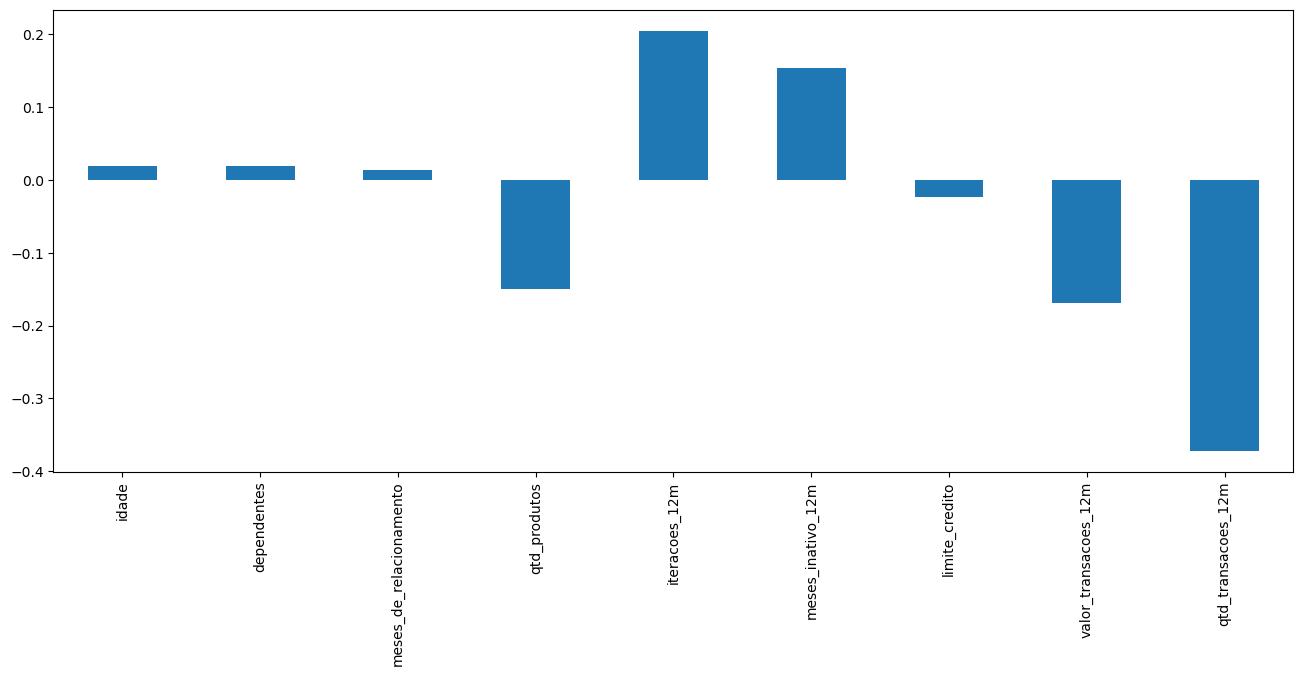

In [26]:
df_de_corr[2:].plot(kind='bar', figsize=(16, 6)); # visualisando o gráfico de correlção das colunas numéricas com a coluna "default".

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_style("whitegrid")


In [41]:
df_adimplente = df[df['default'] == 0]

In [42]:
df_inadimplente = df[df['default'] == 1]

In [43]:
df.select_dtypes('object').head(n=5) # Visualizando as colunas tipo obeject no nosso DataFrame.

,sexo,escolaridade,estado_civil,salario_anual,tipo_cartao
0,M,ensino medio,casado,$60K - $80K,blue
1,F,mestrado,solteiro,menos que $40K,blue
2,M,mestrado,casado,$80K - $120K,blue
4,M,sem educacao formal,casado,$60K - $80K,blue
5,M,mestrado,casado,$40K - $60K,blue


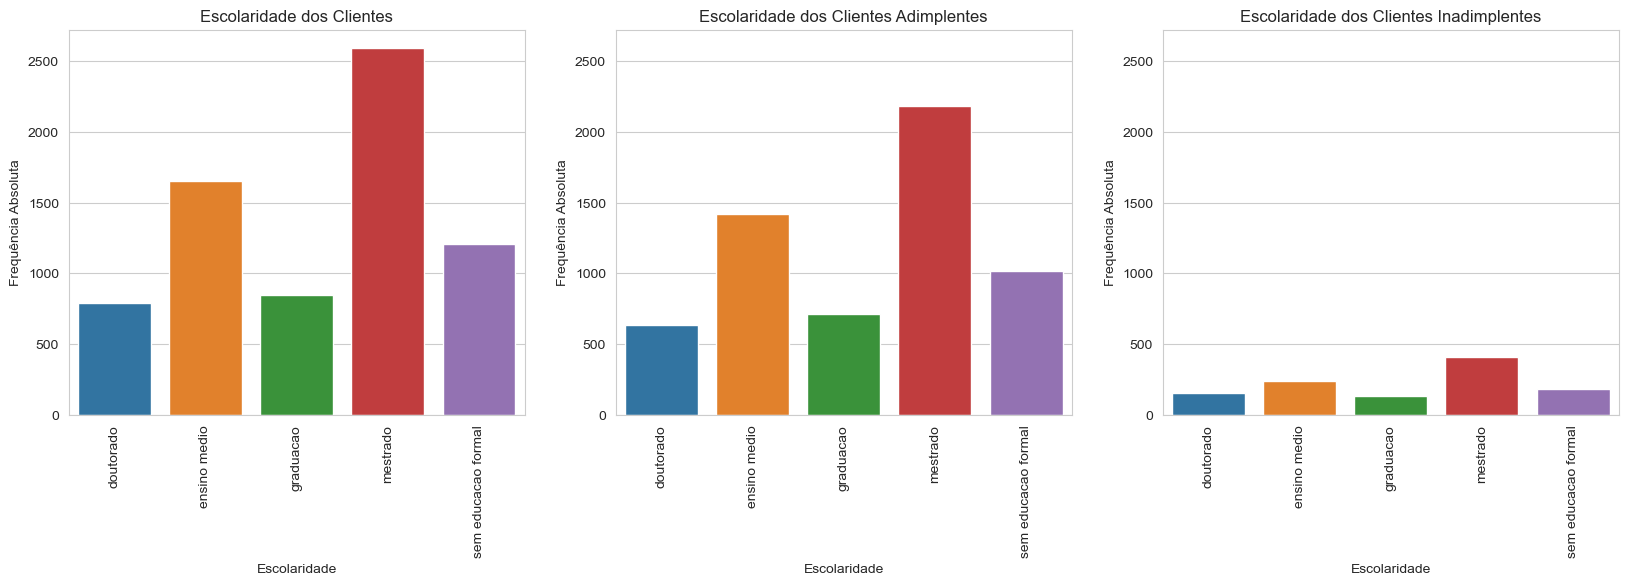

In [44]:
# Plotando um gráfico de barras com a relação entre escolaridade e inadimplência.
coluna="escolaridade"
titulos = ['Escolaridade dos Clientes', 'Escolaridade dos Clientes Adimplentes', 'Escolaridade dos Clientes Inadimplentes']
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)
max_y = 0

for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    df_to_plot = dataframe[coluna].value_counts().reset_index()
    df_to_plot.columns = [coluna, 'frequencia_absoluta']
    df_to_plot.sort_values(by=[coluna], inplace=True)

    f = sns.barplot(data=df_to_plot, x=coluna, y='frequencia_absoluta', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y

for eixo in eixos:
    eixo.set(ylim=(0, max_y))

plt.show()

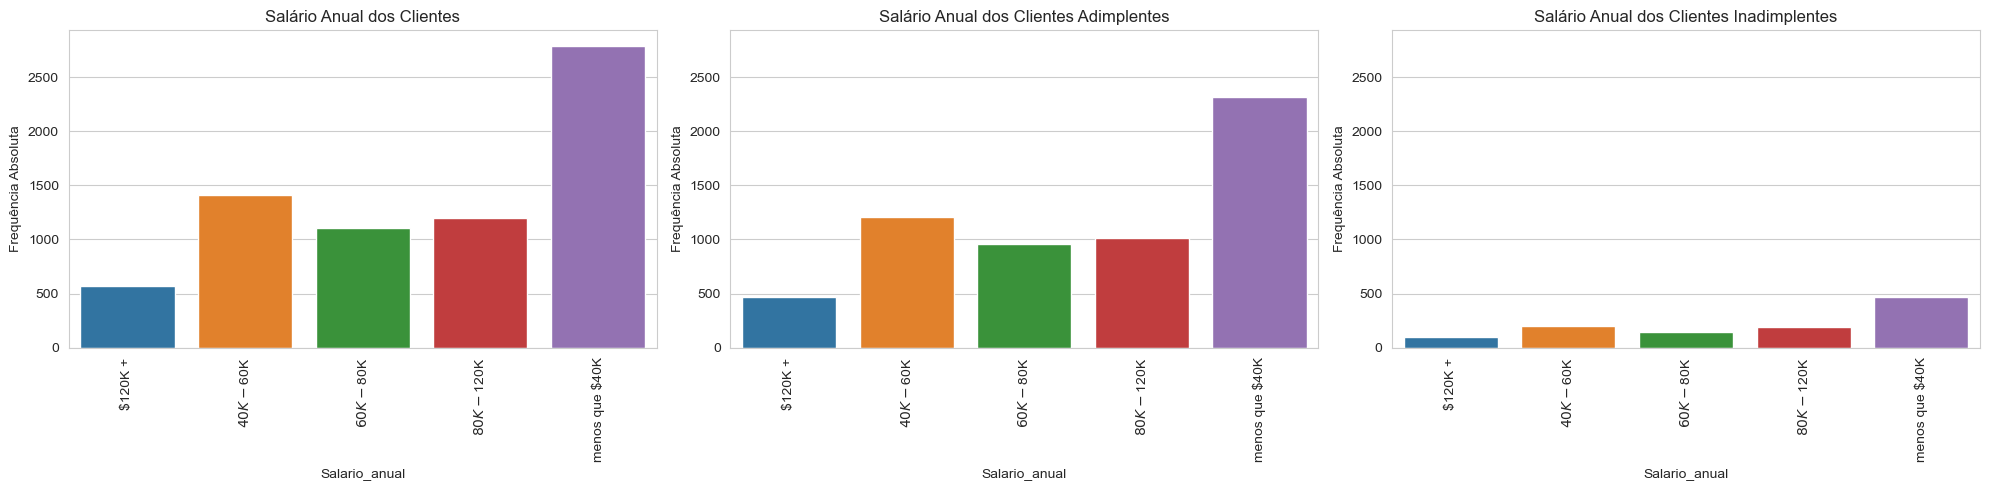

In [52]:
# Plotando um gráfico de barras com a relação entre salário anual e inadimplência.
coluna = 'salario_anual'
titulos = ['Salário Anual dos Clientes', 'Salário Anual dos Clientes Adimplentes', 'Salário Anual dos Clientes Inadimplentes']
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)


for idx, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
   
    df_to_plot = dataframe[coluna].value_counts().to_frame() 
    df_to_plot.columns = ['frequencia_absoluta'] 
    df_to_plot[coluna] = df_to_plot.index
    df_to_plot.reset_index(inplace=True, drop=True)
    df_to_plot.sort_values(by=[coluna], inplace=True)

    
    f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[idx])
    f.set(title=titulos[idx], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

    
    _, max_y_f = f.get_ylim()
    max_y = max(max_y_f, max_y)


for ax in eixos:
    ax.set(ylim=(0, max_y))


plt.tight_layout()
plt.show()

In [ ]:
# Plotando um gráfico com a relação entre quantidade de transações por ano e inadimplência.
coluna = 'qtd_transacoes_12m'
titulos = [ 'Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes' ]
eixo= 0
max_y= 0
figura, eixos= plt.subplots(1,3, figsize=(20, 5), sharex=True)
for eixo, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
    f =  sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set( title=titulos[eixo],
          xlabel=coluna.capitalize(),
          ylabel='FrequênciaAbsoluta'
         )
    _, max_y_f= f.get_ylim()
    max_y= max_y_f if max_y_f> max_y else max_y
    f.set(ylim=(0,  max_y))
    eixo+= 1 
figura.show()
    

C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Gabriel\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


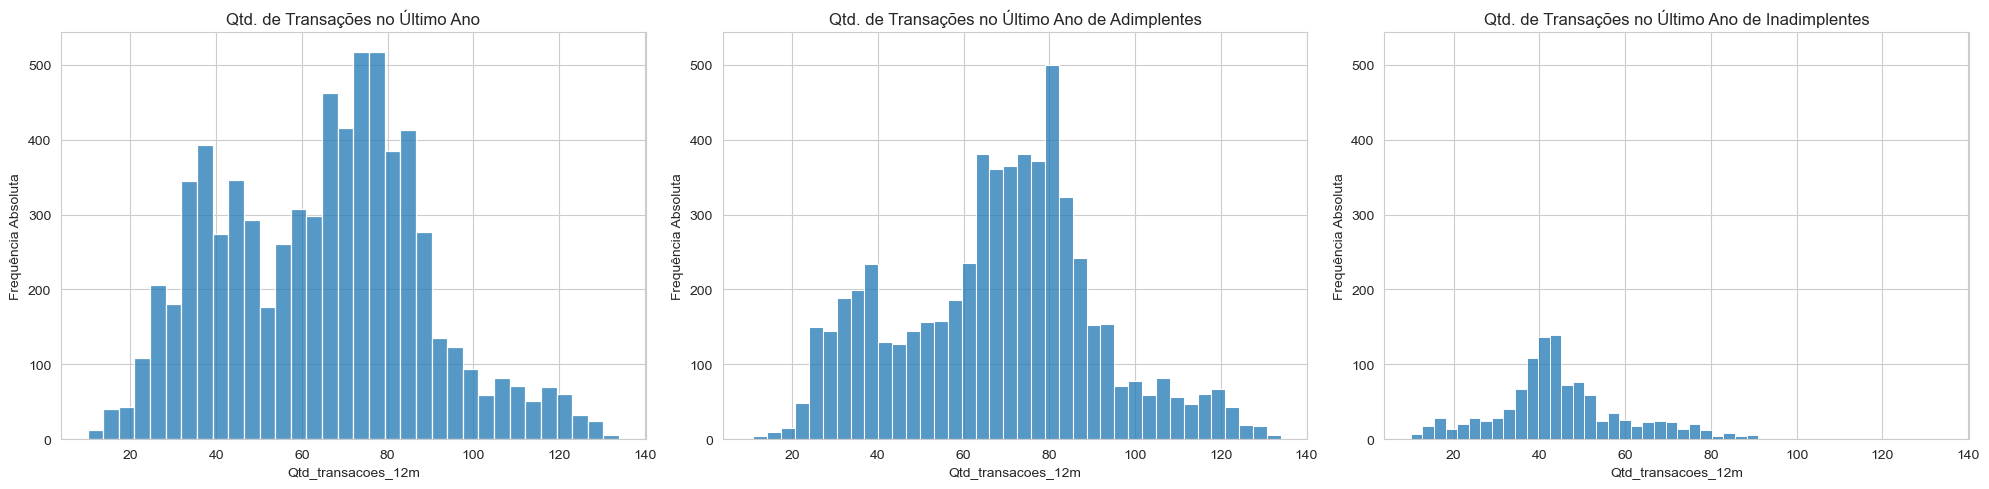

In [54]:
coluna = 'qtd_transacoes_12m'
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)


for idx, dataframe in enumerate([df, df_adimplente, df_inadimplente]):
  
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[idx])
    f.set(title=titulos[idx], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    
    _, max_y_f = f.get_ylim()
    max_y = max(max_y_f, max_y)


for ax in eixos:
    ax.set(ylim=(0, max_y))


plt.tight_layout()
plt.show()

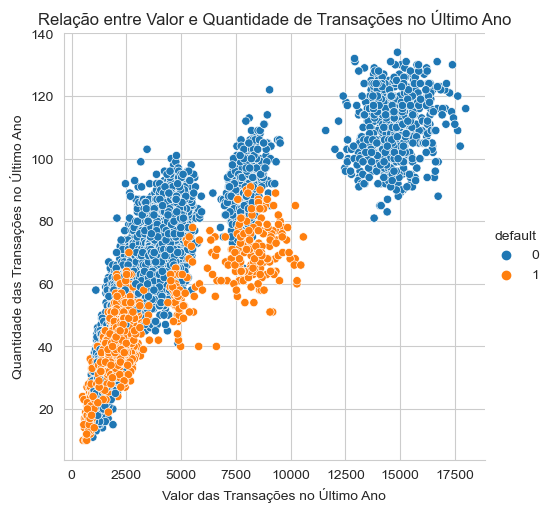

In [60]:
# Criando um gráfico de dispersão entre o valor de transação em um ano, a quantidade de transações em um ano e a inadimplência dos clientes.
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')


f.set(title='Relação entre Valor e Quantidade de Transações no Último Ano', 
      xlabel='Valor das Transações no Último Ano', 
      ylabel='Quantidade das Transações no Último Ano')


plt.show()

# Conclusão


Com os insights gerados pela análise de dados acima, concluímos quais dados possuem grande influência em nosso DataFrame para explicar o comportamento dos clientes inadimplentes. Os principais fatores identificados são a quantidade e os valores das transações. Conforme o gráfico acima no notebook:

*  Observando a intensidade de dados de clientes inadimplentes, podemos notar que há dois grupos que predominam na escala. Quanto menor a quantidade de transações e menores os valores transacionais, há mais clientes se tornando inadimplentes.
  
Com essa análise, é possível criar estratégias para diminuir a quantidade de clientes inadimplentes nas instituições financeiras. Por exemplo:

*   Oferecer programas de educação financeira, com o intuito de auxiliar os clientes a gerenciar melhor seus gastos.
*   Ajustar o limite de crédito com base no histórico de transações dos clientes para evitar o excesso de endividamento.
*   Comunicação direcionada, com SMS e WhatsApp, lembrando-os de seus pagamentos pendentes e oferecendo soluções flexíveis para quitar suas dívidas.
*   Ofertas personalizadas para incentivar o aumento de transações e valores, como, por exemplo, descontos em serviços ou produtos adicionais ao atingir certos níveis de transações.
  
Outro ponto importantíssimo é que, ao oferecer soluções proativas e personalizadas, as instituições podem cultivar relacionamentos mais sólidos e duradouros com os clientes, aumentando a confiança e o engajamento ao longo do tempo.

